<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Assg/blob/main/RidgeLassoRegressionViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Program_2_Dataset.csv")

In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
x = data[['Distance']]
y = data['MValue']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept: ",modelLR.intercept_,"\nCoefficients: ",modelLR.coef_)

Intercept:  18.89062915748152 
Coefficients:  [0.96734149]


In [ ]:
df1 = data
model_pred = 18.89062915748152 + 0.96734149*data['Distance']
df1['Pred_MValue'] = model_pred
df1.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue,Pred_MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,22.271681
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5,21.577710
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,21.653453
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6,21.516671
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,21.516671


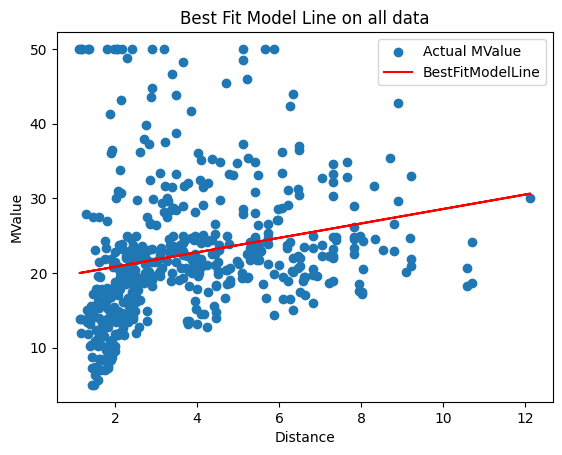

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x='Distance',y='MValue',data=data,label='Actual MValue') #plotting actual minutes
ax.plot(df1['Distance'],df1['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Distance')
ax.set_title('Best Fit Model Line on all data')
ax.legend()
plt.show()

In [ ]:
modelLR.score(x_test,y_test)

0.11432450554573037

In [ ]:
from sklearn.linear_model import Ridge
modelR = Ridge(alpha=1)
modelR.fit(x,y)

Ridge(alpha=1)

In [ ]:
print("Intercept: ",modelR.intercept_,"\nCoefficients: ",modelR.coef_)

Intercept:  18.3919376115109 
Coefficients:  [1.09112573]


In [ ]:
df2 = data
model_pred = 18.3919376115109 + 1.09112573*data['Distance']
df2['Pred_MValue'] = model_pred
df2.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue,Pred_MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,22.205640
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5,21.422867
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,21.508302
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6,21.354017
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,21.354017


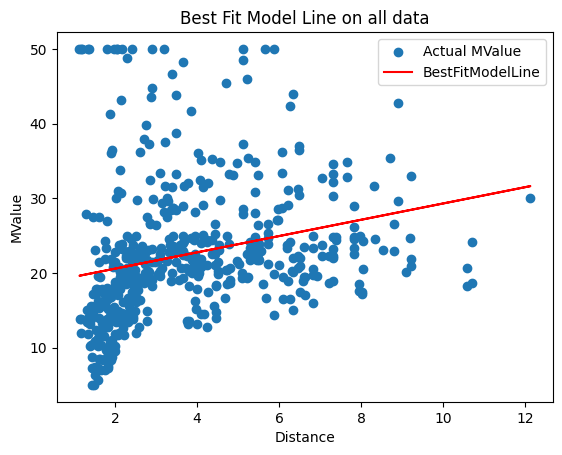

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x='Distance',y='MValue',data=data,label='Actual MValue') #plotting actual minutes
ax.plot(df2['Distance'],df2['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Distance')
ax.set_title('Best Fit Model Line on all data')
ax.legend()
plt.show()

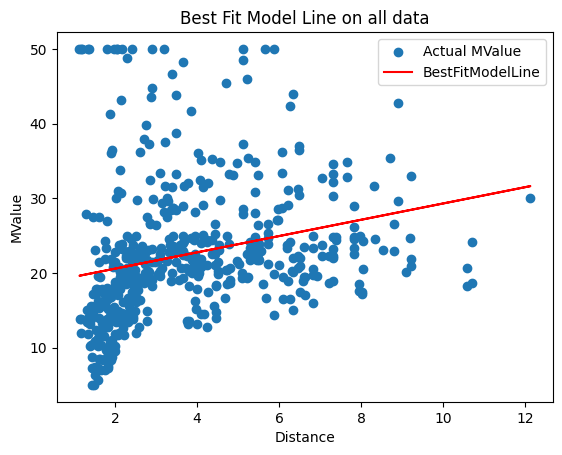

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x='Distance',y='MValue',data=data,label='Actual MValue') #plotting actual minutes
ax.plot(df1['Distance'],df1['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Distance')
ax.set_title('Best Fit Model Line on all data')
ax.legend()
plt.show()

In [ ]:
modelR.score(x_test,y_test)

0.1223028731215362

In [ ]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=1)
modelL.fit(x,y)

Lasso(alpha=1)

In [ ]:
print("Intercept: ",modelL.intercept_,"\nCoefficients: ",modelL.coef_)

Intercept:  19.247676206480538 
Coefficients:  [0.8656372]


In [ ]:
df3 = data
model_pred = 19.247676206480538 + 0.8656372*data['Distance']
df3['Pred_MValue'] = model_pred
df3.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue,Pred_MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,22.273251
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5,21.652243
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,21.720023
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6,21.597622
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,21.597622


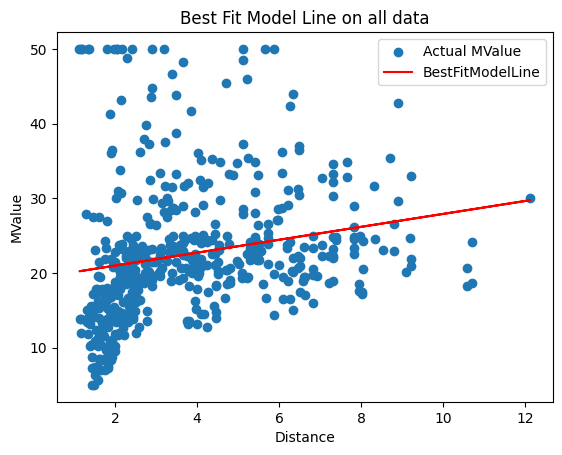

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x='Distance',y='MValue',data=data,label='Actual MValue') #plotting actual minutes
ax.plot(df3['Distance'],df3['Pred_MValue'],color='red',label='BestFitModelLine') #plotting best fit model predictions
ax.set_ylabel('MValue')
ax.set_xlabel('Distance')
ax.set_title('Best Fit Model Line on all data')
ax.legend()
plt.show()

In [ ]:
modelL.score(x_test,y_test)

0.10677263273168636